In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
import kagglehub
olistbr_brazilian_ecommerce_path = kagglehub.dataset_download('olistbr/brazilian-ecommerce')

print('Data source import complete.')

Using Colab cache for faster access to the 'brazilian-ecommerce' dataset.
Data source import complete.


In [3]:
orders = pd.read_csv(os.path.join(olistbr_brazilian_ecommerce_path, "olist_orders_dataset.csv"))
customers = pd.read_csv(os.path.join(olistbr_brazilian_ecommerce_path, "olist_customers_dataset.csv"))
products = pd.read_csv(os.path.join(olistbr_brazilian_ecommerce_path, "olist_products_dataset.csv"))
sellers = pd.read_csv(os.path.join(olistbr_brazilian_ecommerce_path, "olist_sellers_dataset.csv"))
order_items = pd.read_csv(os.path.join(olistbr_brazilian_ecommerce_path, "olist_order_items_dataset.csv"))
order_payments = pd.read_csv(os.path.join(olistbr_brazilian_ecommerce_path, "olist_order_payments_dataset.csv"))
order_reviews = pd.read_csv(os.path.join(olistbr_brazilian_ecommerce_path, "olist_order_reviews_dataset.csv"))
geolocation = pd.read_csv(os.path.join(olistbr_brazilian_ecommerce_path, "olist_geolocation_dataset.csv"))

# Data Exploration

In [4]:
datasets = {
    "customers": customers,
    "geolocation": geolocation,
    "order_items": order_items,
    "order_payments": order_payments,
    "order_reviews": order_reviews,
    "orders": orders,
    "products": products,
    "sellers": sellers
}


In [5]:

for name, df in datasets.items():
    print(f"{name}: {df.shape} ")

customers: (99441, 5) 
geolocation: (1000163, 5) 
order_items: (112650, 7) 
order_payments: (103886, 5) 
order_reviews: (99224, 7) 
orders: (99441, 8) 
products: (32951, 9) 
sellers: (3095, 4) 


In [6]:
for name, df in datasets.items():
    print(f"{name}: {df.info()} ")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
customers: None 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1

In [7]:
# Check for missing values
for name, df in datasets.items():
    print(f"{name}: {df.isna().sum()} ")


customers: customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64 
geolocation: geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64 
order_items: order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 
order_payments: order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64 
order_reviews: review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64 
orders: ord

In [8]:
# Check for Dublicates
for name, df in datasets.items():
    dup_count = df.duplicated().sum()
    print(f"{name}: {dup_count} duplicates")

customers: 0 duplicates
geolocation: 261831 duplicates
order_items: 0 duplicates
order_payments: 0 duplicates
order_reviews: 0 duplicates
orders: 0 duplicates
products: 0 duplicates
sellers: 0 duplicates


In [9]:
# Check for Outliers
for name, df in datasets.items():
    print(f"{name}: {df.describe()} ")


customers:        customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000 
geolocation:        geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01    -4.376771e+01
max                   9.999000e+04     4.506593e+01     1.211054e+02 
order_items:        order_item_id          price  freight_value
c

# Data Preprocessing

In [10]:
# Convert dates from object to datetime
date_columns_orders= ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']
date_columns_order_reviews= ['review_creation_date','review_answer_timestamp']

for col in date_columns_orders:
    orders[col]=pd.to_datetime(orders[col])
for col in date_columns_order_reviews:
    order_reviews[col]=pd.to_datetime(order_reviews[col])

order_items['shipping_limit_date']=pd.to_datetime(order_items['shipping_limit_date'])

In [11]:
# Products--> fill missing values
products['product_category_name'] = products['product_category_name'].fillna("unknown")
products['product_name_lenght'] = products['product_name_lenght'].fillna(0)
products['product_description_lenght'] = products['product_description_lenght'].fillna(0)
products['product_photos_qty'] = products['product_photos_qty'].fillna(0)


In [12]:
# Orders--> fill missing dates with purchase timestamp
orders['order_approved_at'] = orders['order_approved_at'].fillna(orders['order_purchase_timestamp'])
orders['order_delivered_carrier_date'] = orders['order_delivered_carrier_date'].fillna(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = orders['order_delivered_customer_date'].fillna(orders['order_purchase_timestamp'])


In [13]:
# Reviews--> fill missing comments
order_reviews['review_comment_title'] = order_reviews['review_comment_title'].fillna("No review")
order_reviews['review_comment_message'] = order_reviews['review_comment_message'].fillna("No review")

# Add has_review flag
order_reviews['has_review'] = order_reviews.apply(
    lambda row: 0 if row['review_comment_title']=="No review" and row['review_comment_message']=="No review" else 1,
    axis=1
)

In [14]:
# Drop Irrelevant Columns
products=products.dropna(subset=["product_weight_g", "product_length_cm",
                                   "product_height_cm", "product_width_cm"])
customers.drop(['customer_zip_code_prefix'], axis=1, inplace=True)
geolocation.drop(['geolocation_zip_code_prefix'], axis=1, inplace=True)
sellers.drop(['seller_zip_code_prefix'], axis=1, inplace=True)

In [15]:
# Drop Duplicates
geolocation.drop_duplicates(inplace=True)

In [16]:
for name, df in datasets.items():
    print(f"{name}: {df.shape} ")

customers: (99441, 4) 
geolocation: (736786, 4) 
order_items: (112650, 7) 
order_payments: (103886, 5) 
order_reviews: (99224, 8) 
orders: (99441, 8) 
products: (32951, 9) 
sellers: (3095, 3) 


# EDA

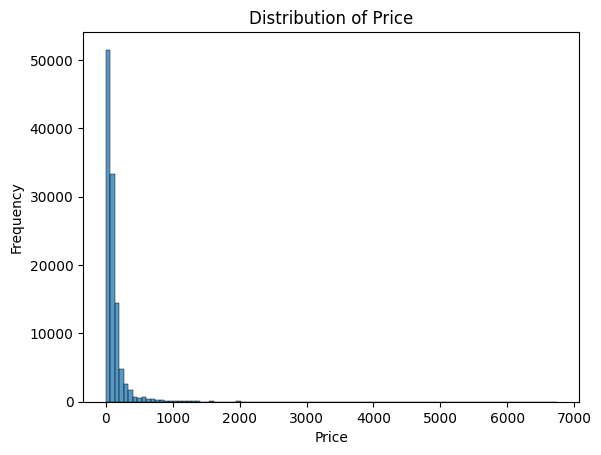

In [17]:
# Price Distribution
sns.histplot(order_items['price'], bins=100)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

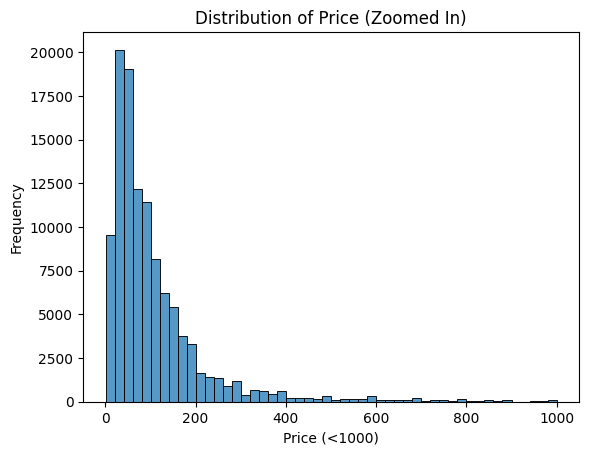

In [18]:
# Zoomed-in version (to ignore extreme outliers)
sns.histplot(order_items[order_items['price'] < 1000]['price'], bins=50)
plt.xlabel('Price (<1000)')
plt.ylabel('Frequency')
plt.title('Distribution of Price (Zoomed In)')
plt.show()

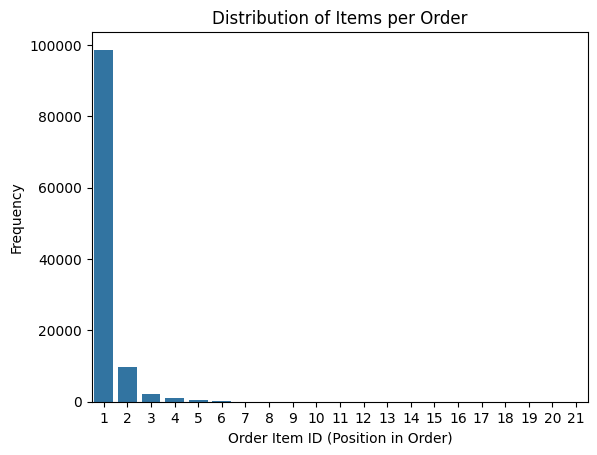

In [19]:
#  Items per Order
sns.countplot(x='order_item_id', data=order_items)
plt.xlabel('Order Item ID (Position in Order)')
plt.ylabel('Frequency')
plt.title('Distribution of Items per Order')
plt.show()

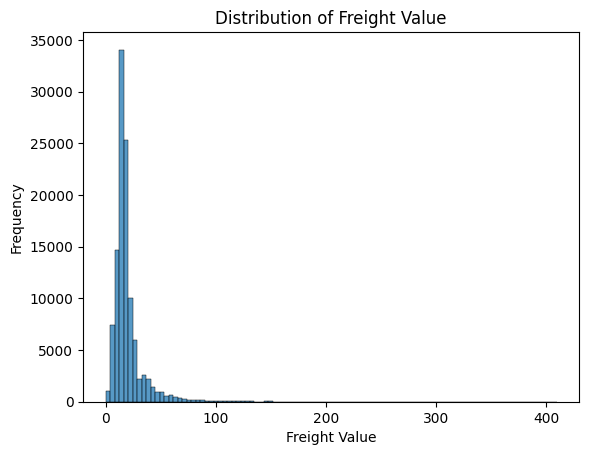

In [20]:
# Freight Value Distribution
sns.histplot(order_items['freight_value'], bins=100)
plt.xlabel('Freight Value')
plt.ylabel('Frequency')
plt.title('Distribution of Freight Value')
plt.show()


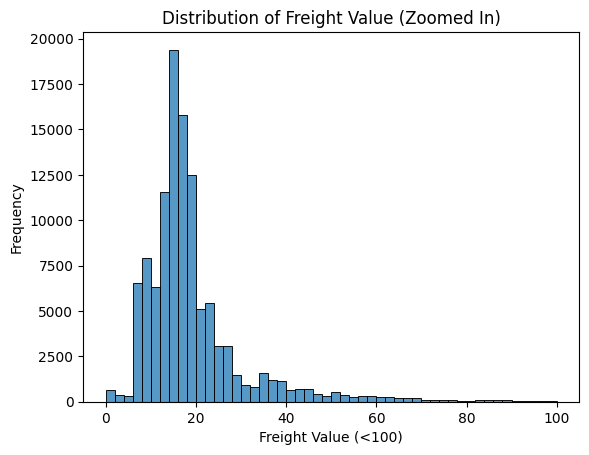

In [21]:
# Zoomed-in version (to ignore extreme outliers)
sns.histplot(order_items[order_items['freight_value'] < 100]['freight_value'], bins=50)
plt.xlabel('Freight Value (<100)')
plt.ylabel('Frequency')
plt.title('Distribution of Freight Value (Zoomed In)')
plt.show()

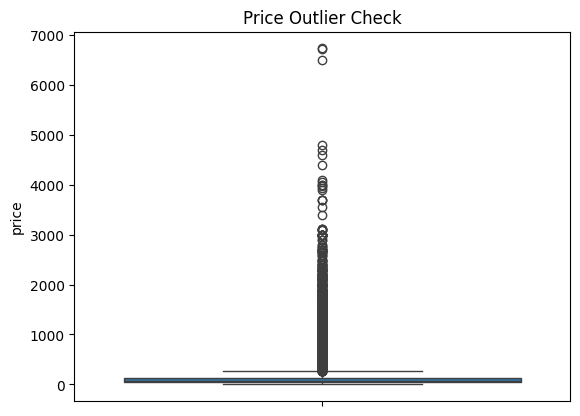

In [22]:
# Price Outlier
sns.boxplot(y=order_items['price'])
plt.title("Price Outlier Check")
plt.show()

### **Extracting Year, Month, Weak, WeakDay**

In [23]:

orders["order_purchase_year"] = orders["order_purchase_timestamp"].dt.year
orders["order_purchase_weekday"] = orders["order_purchase_timestamp"].dt.day_name()
orders['order_purchase_month'] = orders['order_purchase_timestamp'].dt.to_period('M')
orders['order_purchase_week'] = orders['order_purchase_timestamp'].dt.to_period('W')


In [24]:
# Orders per month
monthly_orders = orders.groupby('order_purchase_month').size()
monthly_orders

,0
order_purchase_month,
2016-09,4
2016-10,324
2016-12,1
2017-01,800
2017-02,1780
2017-03,2682
2017-04,2404
2017-05,3700
2017-06,3245


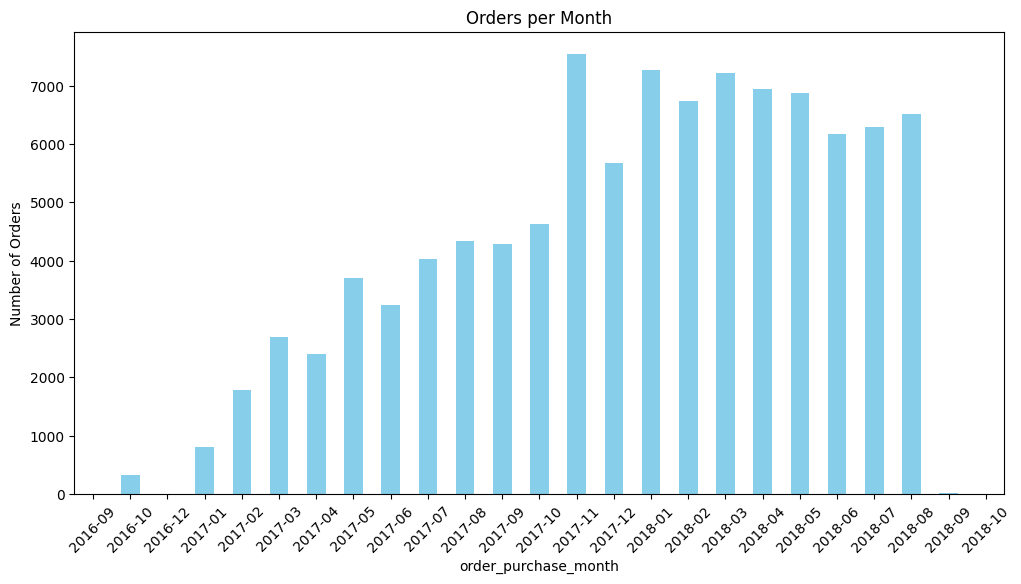

In [25]:
plt.figure(figsize=(12,6))
monthly_orders.plot(kind='bar', color='skyblue')
plt.title("Orders per Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-472896383.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=orders, x='order_purchase_weekday', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette="coolwarm")


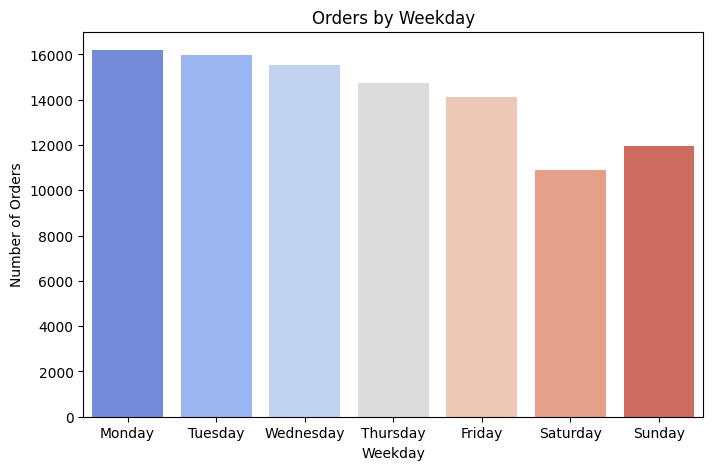

In [26]:
# Orders per weekday
plt.figure(figsize=(8,5))
sns.countplot(data=orders, x='order_purchase_weekday', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette="coolwarm")
plt.title("Orders by Weekday")
plt.ylabel("Number of Orders")
plt.xlabel("Weekday")
plt.show()

### **Revenue over time**

In [27]:
# Merge orders with order_items to get revenue
order_items['revenue'] = order_items['price'] + order_items['freight_value']
revenue_df = order_items.merge(orders[['order_id','order_purchase_timestamp']], on='order_id')

In [28]:
# Revenue by month
revenue_df['order_purchase_month'] = revenue_df['order_purchase_timestamp'].dt.to_period('M')
monthly_revenue = revenue_df.groupby('order_purchase_month')['revenue'].sum()
monthly_revenue

,revenue
order_purchase_month,
2016-09,354.75
2016-10,56808.84
2016-12,19.62
2017-01,137188.49
2017-02,286280.62
2017-03,432048.59
2017-04,412422.24
2017-05,586190.95
2017-06,502963.04


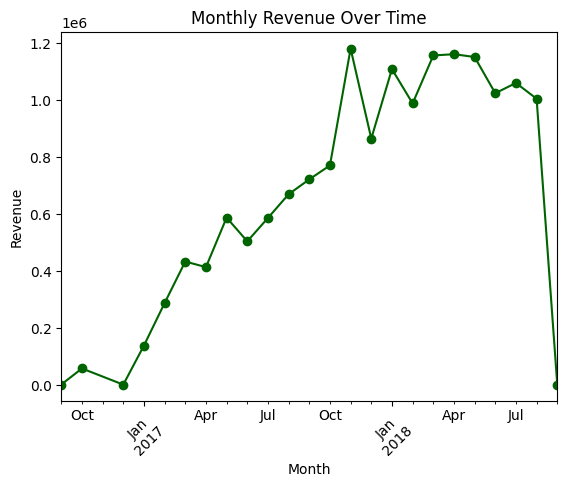

In [29]:

monthly_revenue.plot(kind='line', marker='o', color='darkgreen')
plt.title("Monthly Revenue Over Time")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()

In [30]:
# Top 5 months by revenue
top_months = monthly_revenue.sort_values(ascending=False).head(5)
print("Top 5 Months by Revenue:")
print(top_months)

Top 5 Months by Revenue:
order_purchase_month
2017-11    1179143.77
2018-04    1159698.04
2018-03    1155126.82
2018-05    1149781.82
2018-01    1107301.89
Freq: M, Name: revenue, dtype: float64


/tmp/ipython-input-4137927730.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=order_payments, x='payment_type', palette="coolwarm", order=order_payments['payment_type'].value_counts().index)


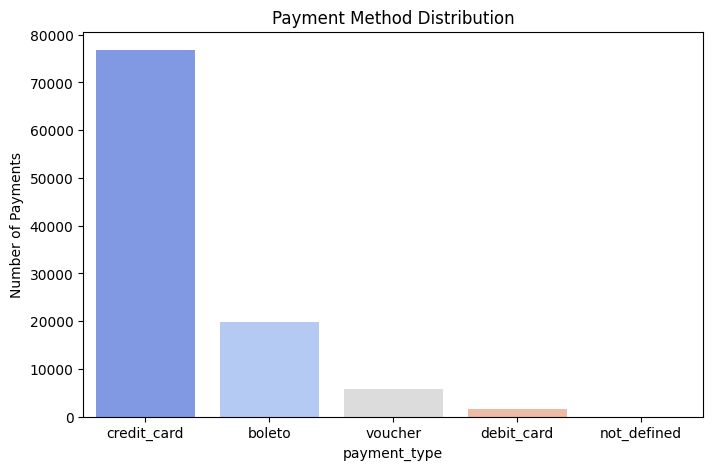

In [31]:
# Payment methods distribution
plt.figure(figsize=(8,5))
sns.countplot(data=order_payments, x='payment_type', palette="coolwarm", order=order_payments['payment_type'].value_counts().index)
plt.title("Payment Method Distribution")
plt.ylabel("Number of Payments")
plt.show()

### **Revenue for each Product Category**

In [32]:
items_products = order_items.merge(products, on='product_id')
category_revenue = items_products.groupby('product_category_name')['price'].sum().sort_values(ascending=False).head(10)


/tmp/ipython-input-2397825633.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_revenue.values, x=category_revenue.index, palette="viridis")


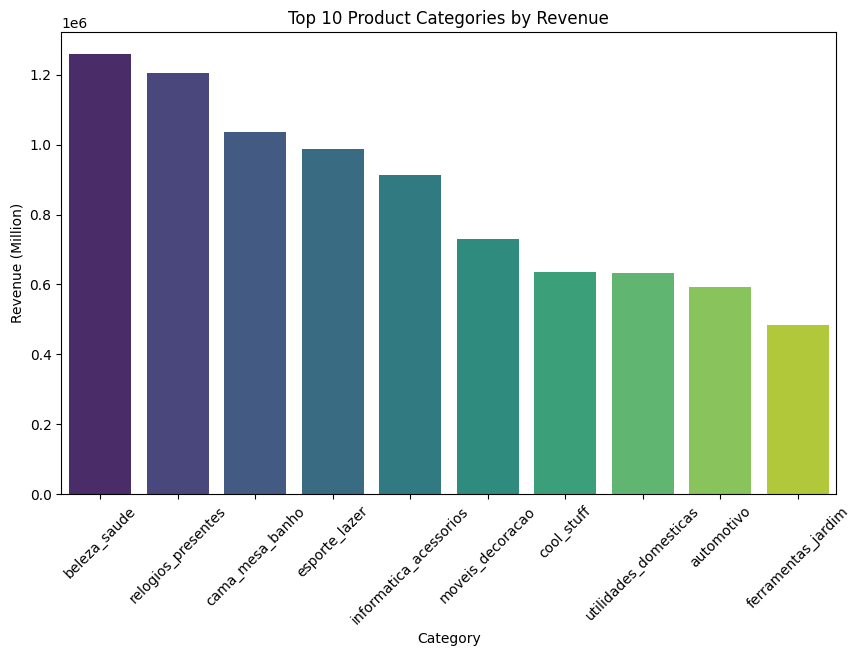

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(y=category_revenue.values, x=category_revenue.index, palette="viridis")
plt.title("Top 10 Product Categories by Revenue")
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Revenue (Million)")
plt.show()

### **Promotion flags / seasonality**

(since we don’t have explicit promotions, we can use holidays for now): we can create a flag for months like November (Black Friday) and December (Christmas), then compare revenue.

In [34]:
revenue_df['month'] = revenue_df['order_purchase_timestamp'].dt.month
revenue_df['holiday_season'] = revenue_df['month'].isin([11,12]).astype(int)

revenue_df.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,revenue,order_purchase_timestamp,order_purchase_month,month,holiday_season
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19,2017-09-13 08:59:02,2017-09,9,0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83,2017-04-26 10:53:06,2017-04,4,0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87,2018-01-14 14:33:31,2018-01,1,0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78,2018-08-08 10:00:35,2018-08,8,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04,2017-02-04 13:57:51,2017-02,2,0
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,34.59,2017-05-15 21:42:34,2017-05,5,0
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,31.75,2017-12-10 11:53:48,2017-12,12,1
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,880.75,2018-07-04 12:08:27,2018-07,7,0
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,157.60,2018-03-19 18:40:33,2018-03,3,0
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40,65.39,2018-07-02 13:59:39,2018-07,7,0


/tmp/ipython-input-580623734.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='holiday_season', y='revenue', data=revenue_df, estimator=sum, palette="coolwarm")


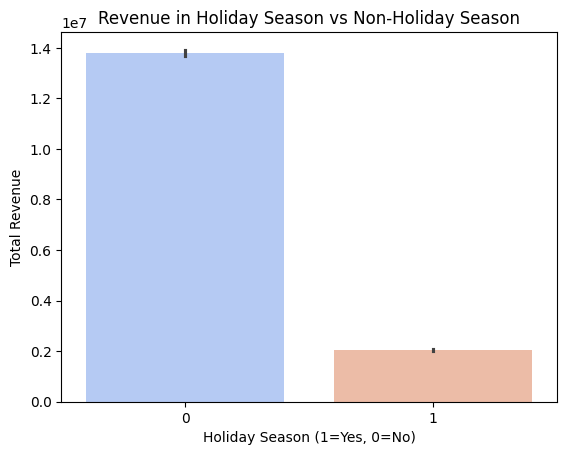

In [35]:
sns.barplot(x='holiday_season', y='revenue', data=revenue_df, estimator=sum, palette="coolwarm")
plt.title("Revenue in Holiday Season vs Non-Holiday Season")
plt.ylabel("Total Revenue")
plt.xlabel("Holiday Season (1=Yes, 0=No)")
plt.show()

In [36]:
# First, merge orders with customers to get customer_state per order
orders_customers = pd.merge(orders, customers, on='customer_id', how='left')

# Filter for delivered orders to consider only completed revenue
delivered_orders = orders_customers[orders_customers['order_status'] == 'delivered']

# Merge with order_payments to get payment values
delivered_payments = pd.merge(delivered_orders, order_payments, on='order_id', how='left')

# Group by customer_state and sum payment_value as revenue
revenue_per_state = delivered_payments.groupby('customer_state')['payment_value'].sum().sort_values(ascending=False).reset_index()
revenue_per_state.columns = ['State', 'Revenue']

# Print the results
print(revenue_per_state)

   State     Revenue
0     SP  5770266.19
1     RJ  2055690.45
2     MG  1819277.61
3     RS   861802.40
4     PR   781919.55
5     SC   595208.40
6     BA   591270.60
7     DF   346146.17
8     GO   334294.22
9     ES   317682.65
10    PE   309074.59
11    CE   266463.97
12    PA   212027.55
13    MT   181441.72
14    MA   147807.29
15    PB   137834.65
16    MS   134421.54
17    PI   105272.17
18    RN   100728.30
19    AL    94195.79
20    SE    70289.13
21    TO    60007.37
22    RO    56975.70
23    AM    27596.18
24    AC    19586.25
25    AP    16141.81
26    RR     9039.52


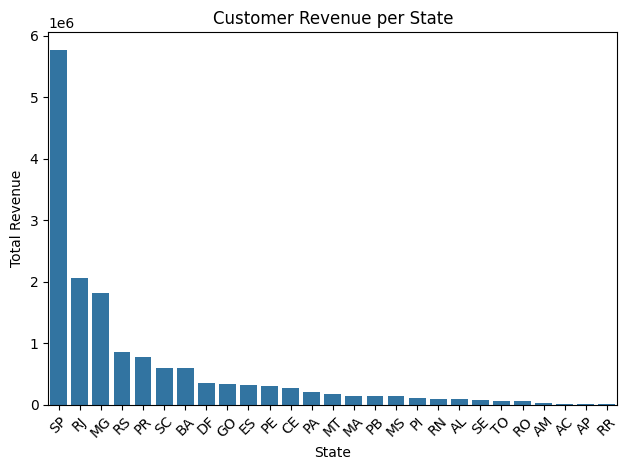

In [37]:
# Plot the revenue per state using seaborn barplot
sns.barplot(x='State', y='Revenue', data=revenue_per_state)
plt.title('Customer Revenue per State')
plt.xlabel('State')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
# Merge orders with customers to get customer_unique_id
order_customers = pd.merge(orders, customers, on='customer_id')

# Filter for delivered orders
delivered_orders = order_customers[order_customers['order_status'] == 'delivered']

# Merge with payments to get payment values
delivered_payments = pd.merge(delivered_orders, order_payments, on='order_id')

# Group by customer_unique_id and sum payment_value as revenue
revenue_per_customer = delivered_payments.groupby('customer_unique_id')['payment_value'].sum().sort_values(ascending=False).reset_index()
revenue_per_customer.columns = ['Customer Unique ID', 'Revenue']

# Get top 10
top_10_customers = revenue_per_customer.head(10)

# Print the results
print(top_10_customers)

                 Customer Unique ID   Revenue
0  0a0a92112bd4c708ca5fde585afaa872  13664.08
1  da122df9eeddfedc1dc1f5349a1a690c   7571.63
2  763c8b1c9c68a0229c42c9fc6f662b93   7274.88
3  dc4802a71eae9be1dd28f5d788ceb526   6929.31
4  459bef486812aa25204be022145caa62   6922.21
5  ff4159b92c40ebe40454e3e6a7c35ed6   6726.66
6  4007669dec559734d6f53e029e360987   6081.54
7  eebb5dda148d3893cdaf5b5ca3040ccb   4764.34
8  48e1ac109decbb87765a3eade6854098   4681.78
9  c8460e4251689ba205045f3ea17884a1   4655.91


In [39]:
# Merge orders with order_items to get items in delivered orders
orders_items = pd.merge(orders, order_items, on='order_id', how='left')

# Filter for delivered orders
delivered_items = orders_items[orders_items['order_status'] == 'delivered']

# Merge with products to get category
delivered_products = pd.merge(delivered_items, products, on='product_id', how='left')

# Group by product_category_name and count the number of items sold (quantity)
quantity_per_category = delivered_products.groupby('product_category_name')['order_item_id'].count().sort_values(ascending=False).reset_index()
quantity_per_category.columns = ['Category', 'Quantity Sold']

# Get top 10
top_10_categories_quantity = quantity_per_category.head(10)

# Print both for completeness
print("Top 10 Categories by Quantity Sold:")
print(top_10_categories_quantity)

Top 10 Categories by Quantity Sold:
                 Category  Quantity Sold
0         cama_mesa_banho          10953
1            beleza_saude           9465
2           esporte_lazer           8431
3        moveis_decoracao           8160
4  informatica_acessorios           7644
5   utilidades_domesticas           6795
6      relogios_presentes           5859
7               telefonia           4430
8      ferramentas_jardim           4268
9              automotivo           4140


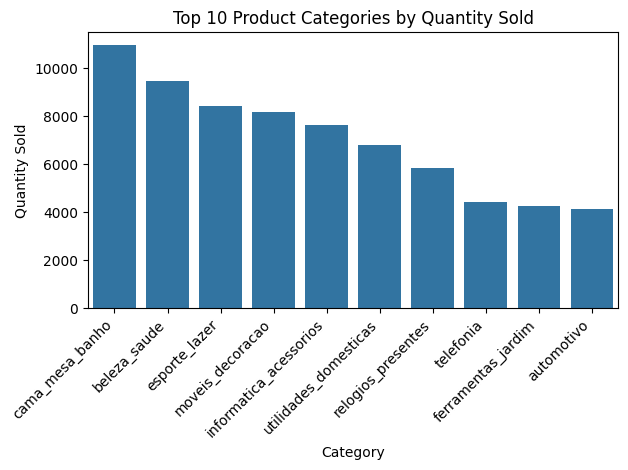

In [40]:
# Plot top 10 by quantity
sns.barplot(x='Category', y='Quantity Sold', data=top_10_categories_quantity)
plt.title('Top 10 Product Categories by Quantity Sold')
plt.xlabel('Category')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [41]:
# by revenue: sum of price
revenue_per_category = delivered_products.groupby('product_category_name')['price'].sum().sort_values(ascending=False).reset_index()
revenue_per_category.columns = ['Category', 'Revenue']

# Get top 10 by revenue
top_10_categories_revenue = revenue_per_category.head(10)

print("\nTop 10 Categories by Revenue:")
print(top_10_categories_revenue)


Top 10 Categories by Revenue:
                 Category     Revenue
0            beleza_saude  1233131.72
1      relogios_presentes  1166176.98
2         cama_mesa_banho  1023434.76
3           esporte_lazer   954852.55
4  informatica_acessorios   888724.61
5        moveis_decoracao   711927.69
6   utilidades_domesticas   615628.69
7              cool_stuff   610204.10
8              automotivo   578966.65
9              brinquedos   471286.48


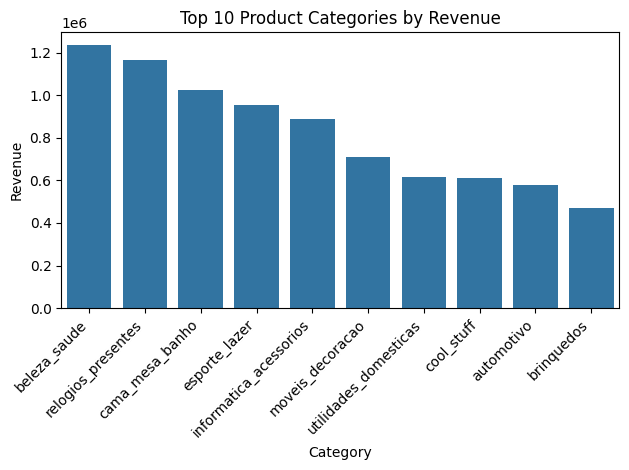

In [42]:
# Plot top 10 by revenue
sns.barplot(x='Category', y='Revenue', data=top_10_categories_revenue)
plt.title('Top 10 Product Categories by Revenue')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [43]:
# Filter for delivered orders
delivered_orders = orders[orders['order_status'] == 'delivered'].copy()

# Compute shipping delay in days
delivered_orders['shipping_delay_days'] = (delivered_orders['order_delivered_customer_date'] -
                                           delivered_orders['order_estimated_delivery_date']).dt.days

# Calculate average shipping delay
average_delay = delivered_orders['shipping_delay_days'].mean()
print(f"Average Shipping Delay: {average_delay:.2f} days (negative means early delivery)")

Average Shipping Delay: -11.88 days (negative means early delivery)


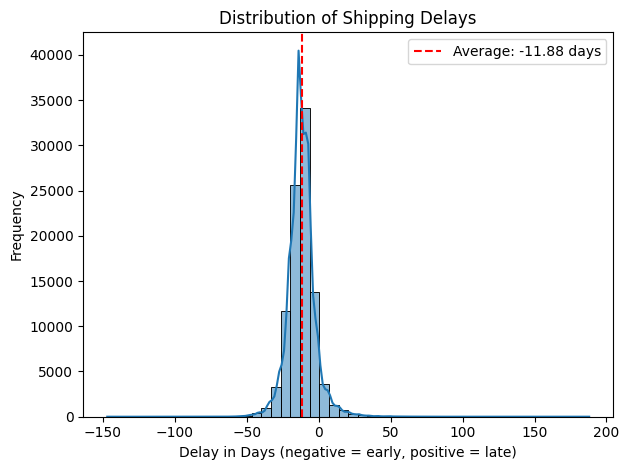

In [44]:
# Plot histogram of shipping delays
sns.histplot(delivered_orders['shipping_delay_days'], bins=50, kde=True)
plt.title('Distribution of Shipping Delays')
plt.xlabel('Delay in Days (negative = early, positive = late)')
plt.ylabel('Frequency')
plt.axvline(average_delay, color='red', linestyle='--', label=f'Average: {average_delay:.2f} days')
plt.legend()
plt.tight_layout()
plt.show()

In [45]:
# Merge order_reviews with order_items to associate reviews with products
reviews_items = pd.merge(order_reviews, order_items, on='order_id', how='left')

# Merge with products to get category
reviews_products = pd.merge(reviews_items, products, on='product_id', how='left')

# Optional: Merge with orders to filter for delivered, but reviews are typically for delivered orders
reviews_orders = pd.merge(reviews_products, orders, on='order_id', how='left')
delivered_reviews = reviews_orders[reviews_orders['order_status'] == 'delivered']

# Group by product_category_name and compute average review_score
avg_score_per_category = delivered_reviews.groupby('product_category_name')['review_score'].mean().sort_values(ascending=False).reset_index()
avg_score_per_category.columns = ['Category', 'Average Score']

# Get top 10 categories with highest average scores
top_10_categories = avg_score_per_category.head(10)

# Print the results
print(top_10_categories)

                             Category  Average Score
0       fashion_roupa_infanto_juvenil       5.000000
1                   cds_dvds_musicais       4.642857
2              livros_interesse_geral       4.512195
3                   livros_importados       4.508772
4  construcao_ferramentas_ferramentas       4.444444
5         portateis_casa_forno_e_cafe       4.438356
6                              flores       4.419355
7                     livros_tecnicos       4.393939
8                   alimentos_bebidas       4.369004
9                     fashion_esporte       4.366667


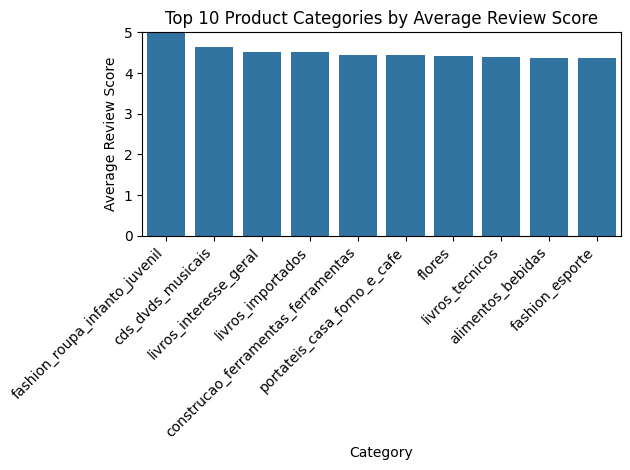

In [46]:
# Plot the top 10 categories by average review score
sns.barplot(x='Category', y='Average Score', data=top_10_categories)
plt.title('Top 10 Product Categories by Average Review Score')
plt.xlabel('Category')
plt.ylabel('Average Review Score')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

In [47]:
geolocation.head()

,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,-23.545621,-46.639292,sao paulo,SP
1,-23.546081,-46.644820,sao paulo,SP
2,-23.546129,-46.642951,sao paulo,SP
3,-23.544392,-46.639499,sao paulo,SP
4,-23.541578,-46.641607,sao paulo,SP


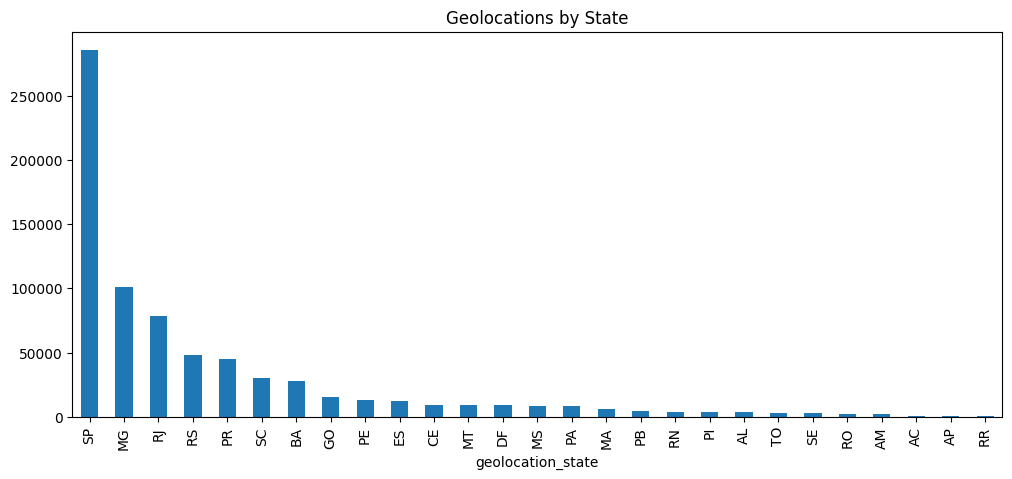

In [48]:
geolocation["geolocation_state"].value_counts().plot(
    kind="bar", figsize=(12,5), title="Geolocations by State"
)
plt.show()

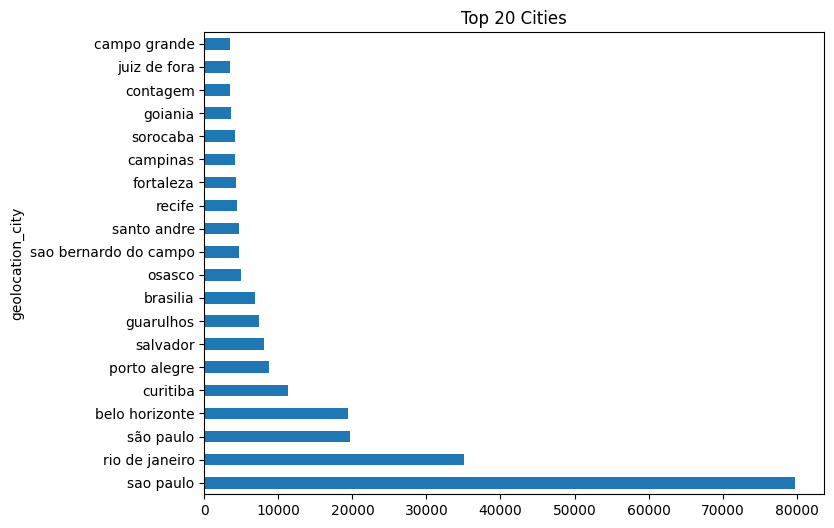

In [49]:
geolocation["geolocation_city"].value_counts().head(20).plot(
    kind="barh", figsize=(8,6), title="Top 20 Cities"
)
plt.show()

In [50]:
print("Latitude range:", (geolocation["geolocation_lat"].min(), geolocation["geolocation_lat"].max()))
print("Longitude range:", (geolocation["geolocation_lng"].min(), geolocation["geolocation_lng"].max()))

Latitude range: (-36.6053744107061, 45.06593318269697)
Longitude range: (-101.46676644931476, 121.10539381057764)


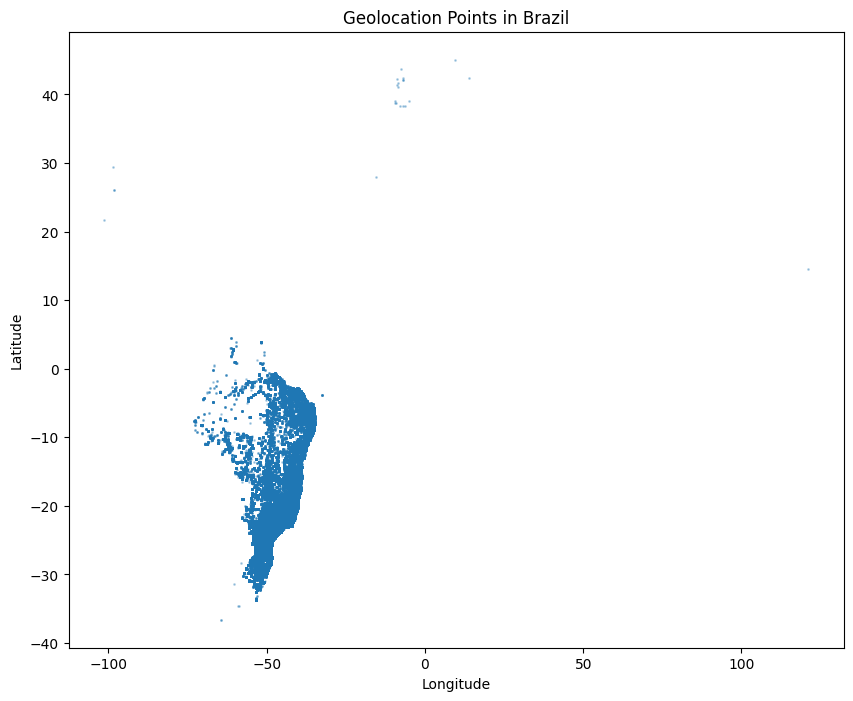

In [51]:
plt.figure(figsize=(10,8))
plt.scatter(geolocation["geolocation_lng"], geolocation["geolocation_lat"], s=1, alpha=0.3)
plt.title("Geolocation Points in Brazil")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [52]:
orders["delivered_on_time"] = (orders["order_delivered_customer_date"] <= orders["order_estimated_delivery_date"]).astype(int)

# Optional: Late days (for analysis)
orders["delay_days"] = (orders["order_delivered_customer_date"] - orders["order_estimated_delivery_date"]).dt.days
orders["delay_days"] = orders["delay_days"].apply(lambda x: x if x > 0 else 0)
orders[["order_id", "order_delivered_customer_date", "order_estimated_delivery_date", "delivered_on_time", "delay_days"]].head(40)

,order_id,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time,delay_days
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-10 21:25:13,2017-10-18,1,0
1,53cdb2fc8bc7dce0b6741e2150273451,2018-08-07 15:27:45,2018-08-13,1,0
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-17 18:06:29,2018-09-04,1,0
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-12-02 00:28:42,2017-12-15,1,0
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-16 18:17:02,2018-02-26,1,0
5,a4591c265e18cb1dcee52889e2d8acc3,2017-07-26 10:57:55,2017-08-01,1,0
6,136cce7faa42fdb2cefd53fdc79a6098,2017-04-11 12:22:08,2017-05-09,1,0
7,6514b8ad8028c9f2cc2374ded245783f,2017-05-26 12:55:51,2017-06-07,1,0
8,76c6e866289321a7c93b82b54852dc33,2017-02-02 14:08:10,2017-03-06,1,0
9,e69bfb5eb88e0ed6a785585b27e16dbf,2017-08-16 17:14:30,2017-08-23,1,0


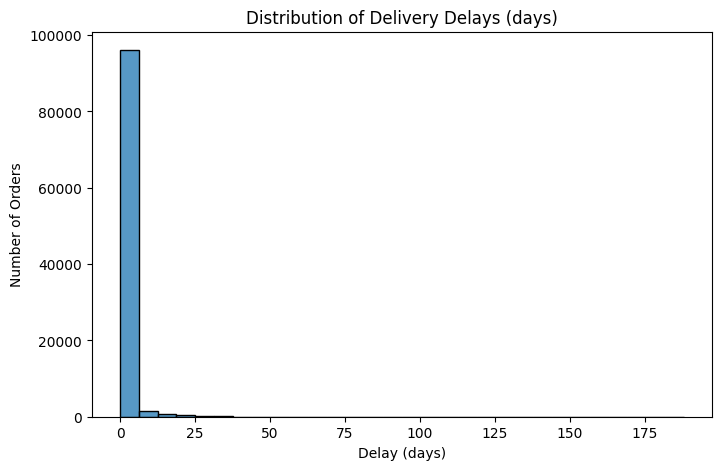

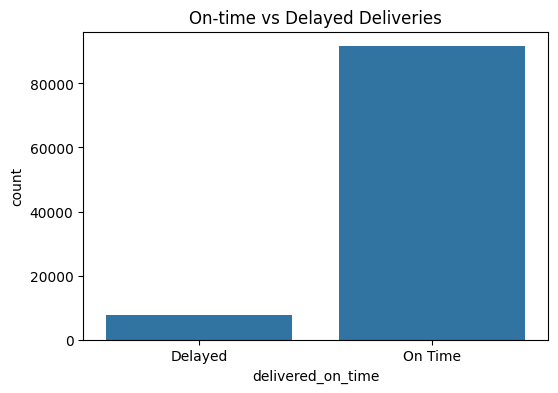

Percentage on time: 92.12900111623978


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of delays
plt.figure(figsize=(8,5))
sns.histplot(orders["delay_days"], bins=30, kde=False)
plt.title("Distribution of Delivery Delays (days)")
plt.xlabel("Delay (days)")
plt.ylabel("Number of Orders")
plt.show()

# % of on-time vs delayed
plt.figure(figsize=(6,4))
sns.countplot(x="delivered_on_time", data=orders)
plt.xticks([0,1], ["Delayed", "On Time"])
plt.title("On-time vs Delayed Deliveries")
plt.show()

print("Percentage on time:", orders["delivered_on_time"].mean()*100)


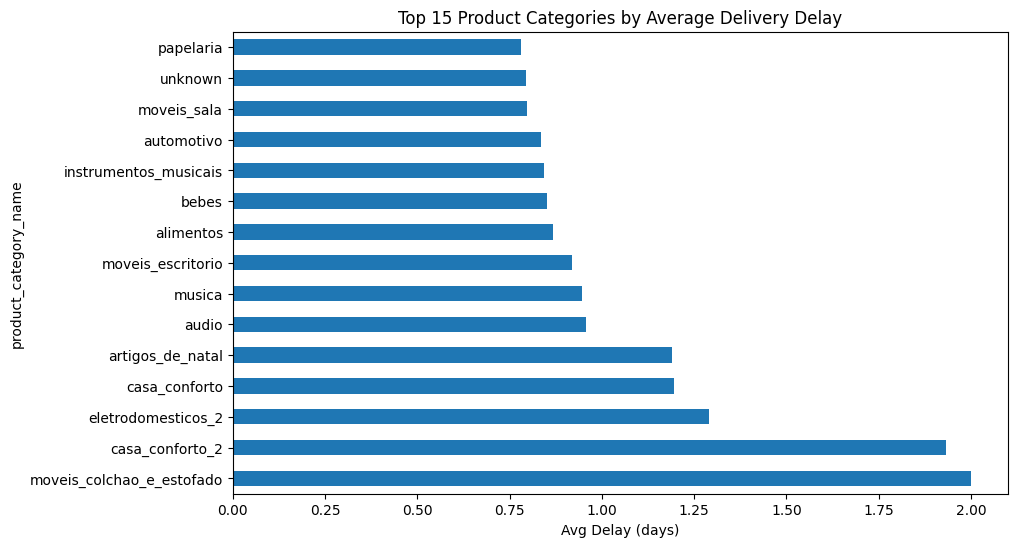

In [54]:
orders_products = orders.merge(order_items[["order_id","product_id"]], on="order_id", how="left")
orders_products = orders_products.merge(products[["product_id","product_category_name"]], on="product_id", how="left")

delay_by_cat = orders_products.groupby("product_category_name")["delay_days"].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
delay_by_cat.plot(kind="barh")
plt.title("Top 15 Product Categories by Average Delivery Delay")
plt.xlabel("Avg Delay (days)")
plt.show()

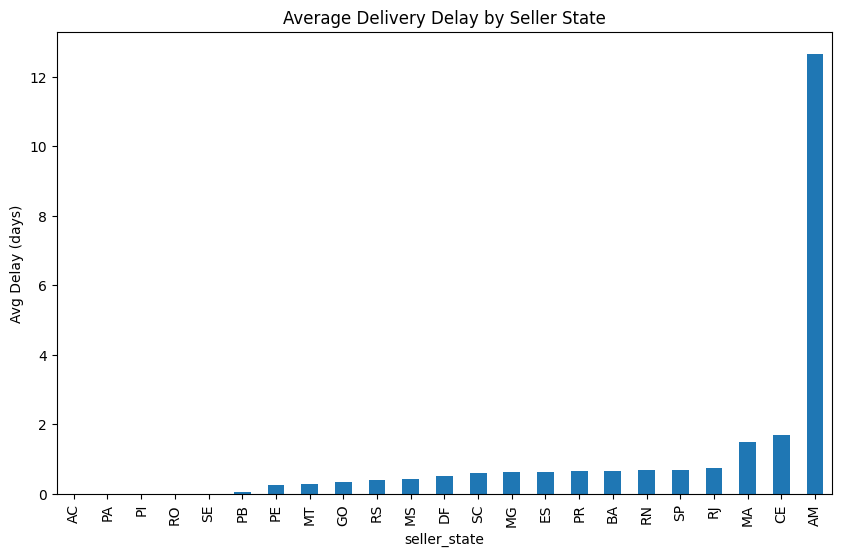

In [55]:
orders_sellers = orders.merge(order_items[["order_id","seller_id"]], on="order_id", how="left")
orders_sellers = orders_sellers.merge(sellers[["seller_id","seller_state"]], on="seller_id", how="left")

delay_by_state = orders_sellers.groupby("seller_state")["delay_days"].mean().sort_values()

plt.figure(figsize=(10,6))
delay_by_state.plot(kind="bar")
plt.title("Average Delivery Delay by Seller State")
plt.ylabel("Avg Delay (days)")
plt.show()

In [56]:
orders_customers = orders.merge(customers, on="customer_id", how="left")

# Add delivery features
orders_customers["order_estimated_delivery_date"] = pd.to_datetime(orders_customers["order_estimated_delivery_date"])
orders_customers["order_delivered_customer_date"] = pd.to_datetime(orders_customers["order_delivered_customer_date"])

# Delivery on-time flag
orders_customers["delivered_on_time"] = (
    orders_customers["order_delivered_customer_date"] <= orders_customers["order_estimated_delivery_date"]
).astype(int)

# Delay days
orders_customers["delay_days"] = (
    orders_customers["order_delivered_customer_date"] - orders_customers["order_estimated_delivery_date"]
).dt.days
orders_customers["delay_days"] = orders_customers["delay_days"].apply(lambda x: x if x > 0 else 0)


In [57]:
orders_customers.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_weekday,order_purchase_month,order_purchase_week,delivered_on_time,delay_days,customer_unique_id,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,Monday,2017-10,2017-10-02/2017-10-08,1,0,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,Tuesday,2018-07,2018-07-23/2018-07-29,1,0,af07308b275d755c9edb36a90c618231,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,Wednesday,2018-08,2018-08-06/2018-08-12,1,0,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,Saturday,2017-11,2017-11-13/2017-11-19,1,0,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,Tuesday,2018-02,2018-02-12/2018-02-18,1,0,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP


In [58]:
orders_geo = orders_customers.merge(
    geolocation.drop_duplicates(subset=["geolocation_city", "geolocation_state"]),
    left_on=["customer_city", "customer_state"],
    right_on=["geolocation_city", "geolocation_state"],
    how="left"
)

/tmp/ipython-input-832970174.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=on_time_state, x="customer_state", y="delivered_on_time", palette="viridis")


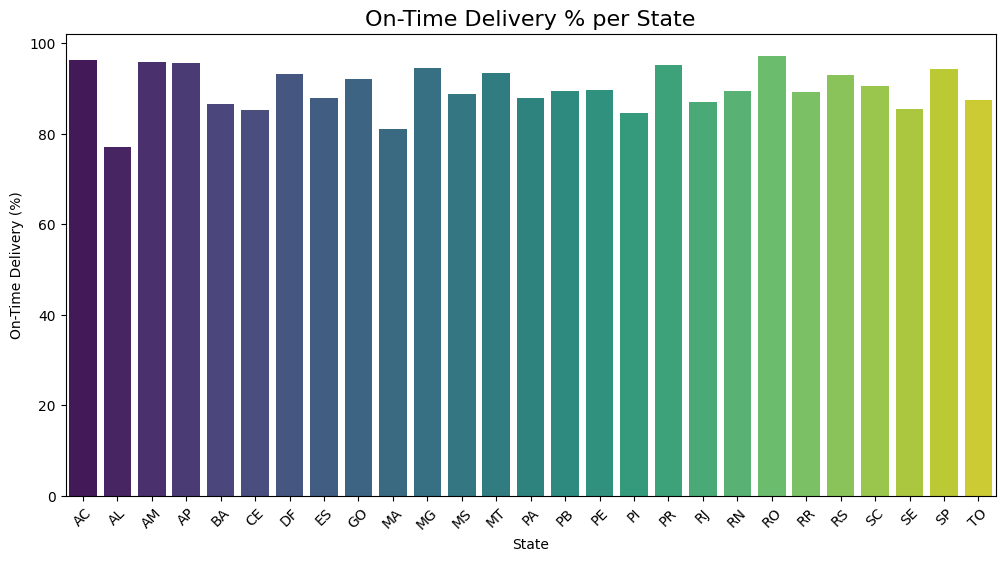

In [59]:
# Group by state
on_time_state = orders_geo.groupby("customer_state")["delivered_on_time"].mean().reset_index()
on_time_state["delivered_on_time"] *= 100  # convert to %

plt.figure(figsize=(12,6))
sns.barplot(data=on_time_state, x="customer_state", y="delivered_on_time", palette="viridis")
plt.title("On-Time Delivery % per State", fontsize=16)
plt.ylabel("On-Time Delivery (%)")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-748978301.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=delay_state, x="customer_state", y="delay_days", palette="mako")


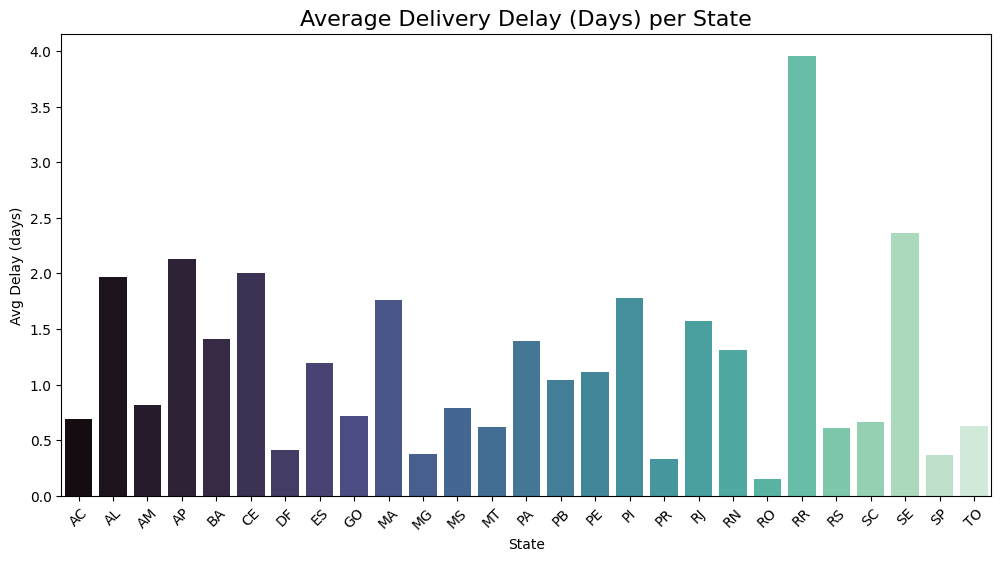

In [60]:
delay_state = orders_geo.groupby("customer_state")["delay_days"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=delay_state, x="customer_state", y="delay_days", palette="mako")
plt.title("Average Delivery Delay (Days) per State", fontsize=16)
plt.ylabel("Avg Delay (days)")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.show()

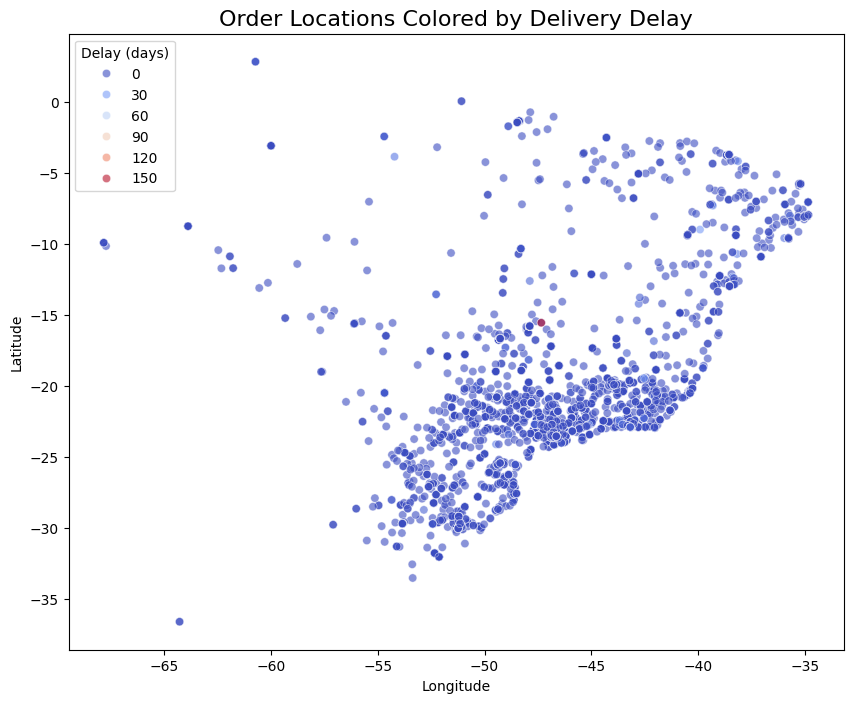

In [61]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    data=orders_geo.sample(5000, random_state=42),  # sample for speed
    x="geolocation_lng", y="geolocation_lat",
    hue="delay_days", palette="coolwarm", alpha=0.6
)
plt.title("Order Locations Colored by Delivery Delay", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Delay (days)")
plt.show()

In [62]:
for name, df in datasets.items():
    print(f"{name}: {df.info()} ")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         99441 non-null  object
 1   customer_unique_id  99441 non-null  object
 2   customer_city       99441 non-null  object
 3   customer_state      99441 non-null  object
dtypes: object(4)
memory usage: 3.0+ MB
customers: None 
<class 'pandas.core.frame.DataFrame'>
Index: 736786 entries, 0 to 1000161
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   geolocation_lat    736786 non-null  float64
 1   geolocation_lng    736786 non-null  float64
 2   geolocation_city   736786 non-null  object 
 3   geolocation_state  736786 non-null  object 
dtypes: float64(2), object(2)
memory usage: 28.1+ MB
geolocation: None 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 1126

In [63]:
order_comp= pd.merge(left=orders, right= order_items, on= 'order_id', how='inner')

In [64]:
Order_cons=pd.merge(left=order_comp, right=products, on='product_id', how='inner')

In [65]:
order_with_seller=pd.merge(left=Order_cons, right=sellers, on='seller_id', how='left')

In [66]:
order_with_seller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112632 entries, 0 to 112631
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112632 non-null  object        
 1   customer_id                    112632 non-null  object        
 2   order_status                   112632 non-null  object        
 3   order_purchase_timestamp       112632 non-null  datetime64[ns]
 4   order_approved_at              112632 non-null  datetime64[ns]
 5   order_delivered_carrier_date   112632 non-null  datetime64[ns]
 6   order_delivered_customer_date  112632 non-null  datetime64[ns]
 7   order_estimated_delivery_date  112632 non-null  datetime64[ns]
 8   order_purchase_year            112632 non-null  int32         
 9   order_purchase_weekday         112632 non-null  object        
 10  order_purchase_month           112632 non-null  period[M]     
 11  

In [67]:
order_with_customer=pd.merge(left=order_with_seller, right=customers, on='customer_id', how='left')

In [68]:
olist_cons=pd.merge(left=order_with_customer, right=order_reviews, on='order_id', how='inner')

In [69]:
olist_cons.drop(columns=['review_comment_title','review_comment_message'], inplace=True)

In [70]:
olist_cons.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0
order_purchase_year,0
order_purchase_weekday,0


In [71]:
olist_cons.duplicated().sum()

np.int64(0)

In [72]:
final=olist_cons.loc[olist_cons['order_status']=='delivered']

In [73]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109995 entries, 0 to 112353
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       109995 non-null  object        
 1   customer_id                    109995 non-null  object        
 2   order_status                   109995 non-null  object        
 3   order_purchase_timestamp       109995 non-null  datetime64[ns]
 4   order_approved_at              109995 non-null  datetime64[ns]
 5   order_delivered_carrier_date   109995 non-null  datetime64[ns]
 6   order_delivered_customer_date  109995 non-null  datetime64[ns]
 7   order_estimated_delivery_date  109995 non-null  datetime64[ns]
 8   order_purchase_year            109995 non-null  int32         
 9   order_purchase_weekday         109995 non-null  object        
 10  order_purchase_month           109995 non-null  period[M]     
 11  order

In [74]:
final_cleaned=final.drop(columns=['order_status', 'review_creation_date', 'review_answer_timestamp'])

In [75]:
final_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109995 entries, 0 to 112353
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       109995 non-null  object        
 1   customer_id                    109995 non-null  object        
 2   order_purchase_timestamp       109995 non-null  datetime64[ns]
 3   order_approved_at              109995 non-null  datetime64[ns]
 4   order_delivered_carrier_date   109995 non-null  datetime64[ns]
 5   order_delivered_customer_date  109995 non-null  datetime64[ns]
 6   order_estimated_delivery_date  109995 non-null  datetime64[ns]
 7   order_purchase_year            109995 non-null  int32         
 8   order_purchase_weekday         109995 non-null  object        
 9   order_purchase_month           109995 non-null  period[M]     
 10  order_purchase_week            109995 non-null  period[W-SUN] 
 11  deliv

In [76]:
final_cleaned.duplicated().sum()

np.int64(0)

In [77]:
final_cleaned.rename(columns = {'order_item_id':'qty' }, inplace = True)

In [78]:
final_cleaned.drop(columns='review_id', inplace=True)

In [79]:
final_cleaned['sales']=final_cleaned['qty']*final_cleaned['price']

In [80]:
final_cleaned.duplicated().sum()

np.int64(351)

In [81]:
final_cleaned = final_cleaned.drop_duplicates()

In [82]:
import holidays

br_holidays = holidays.Brazil(years=range(2016, 2019))
hol_df = pd.DataFrame(list(br_holidays.items()), columns=['date', 'holiday_name'])
hol_df.head()

,date,holiday_name
0,2016-01-01,Universal Fraternization Day
1,2016-03-25,Good Friday
2,2016-04-21,Tiradentes' Day
3,2016-05-01,Worker's Day
4,2016-09-07,Independence Day


In [83]:
final_cleaned['is_holiday'] = final_cleaned['order_purchase_timestamp'].dt.date.isin(br_holidays)

In [84]:
final_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109644 entries, 0 to 112353
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       109644 non-null  object        
 1   customer_id                    109644 non-null  object        
 2   order_purchase_timestamp       109644 non-null  datetime64[ns]
 3   order_approved_at              109644 non-null  datetime64[ns]
 4   order_delivered_carrier_date   109644 non-null  datetime64[ns]
 5   order_delivered_customer_date  109644 non-null  datetime64[ns]
 6   order_estimated_delivery_date  109644 non-null  datetime64[ns]
 7   order_purchase_year            109644 non-null  int32         
 8   order_purchase_weekday         109644 non-null  object        
 9   order_purchase_month           109644 non-null  period[M]     
 10  order_purchase_week            109644 non-null  period[W-SUN] 
 11  deliv

In [85]:
final_cleaned['year']=pd.to_datetime(final_cleaned['order_purchase_timestamp']).dt.year
final_cleaned['month']=pd.to_datetime(final_cleaned['order_purchase_timestamp']).dt.month
final_cleaned['week']=pd.to_datetime(final_cleaned['order_purchase_timestamp']).dt.isocalendar().week
final_cleaned['dayofweek']=pd.to_datetime(final_cleaned['order_purchase_timestamp']).dt.weekday
final_cleaned['is_holiday'] = final_cleaned['is_holiday'].astype(int)

In [86]:
final_cleaned.drop(columns='revenue', inplace=True)

<Axes: >

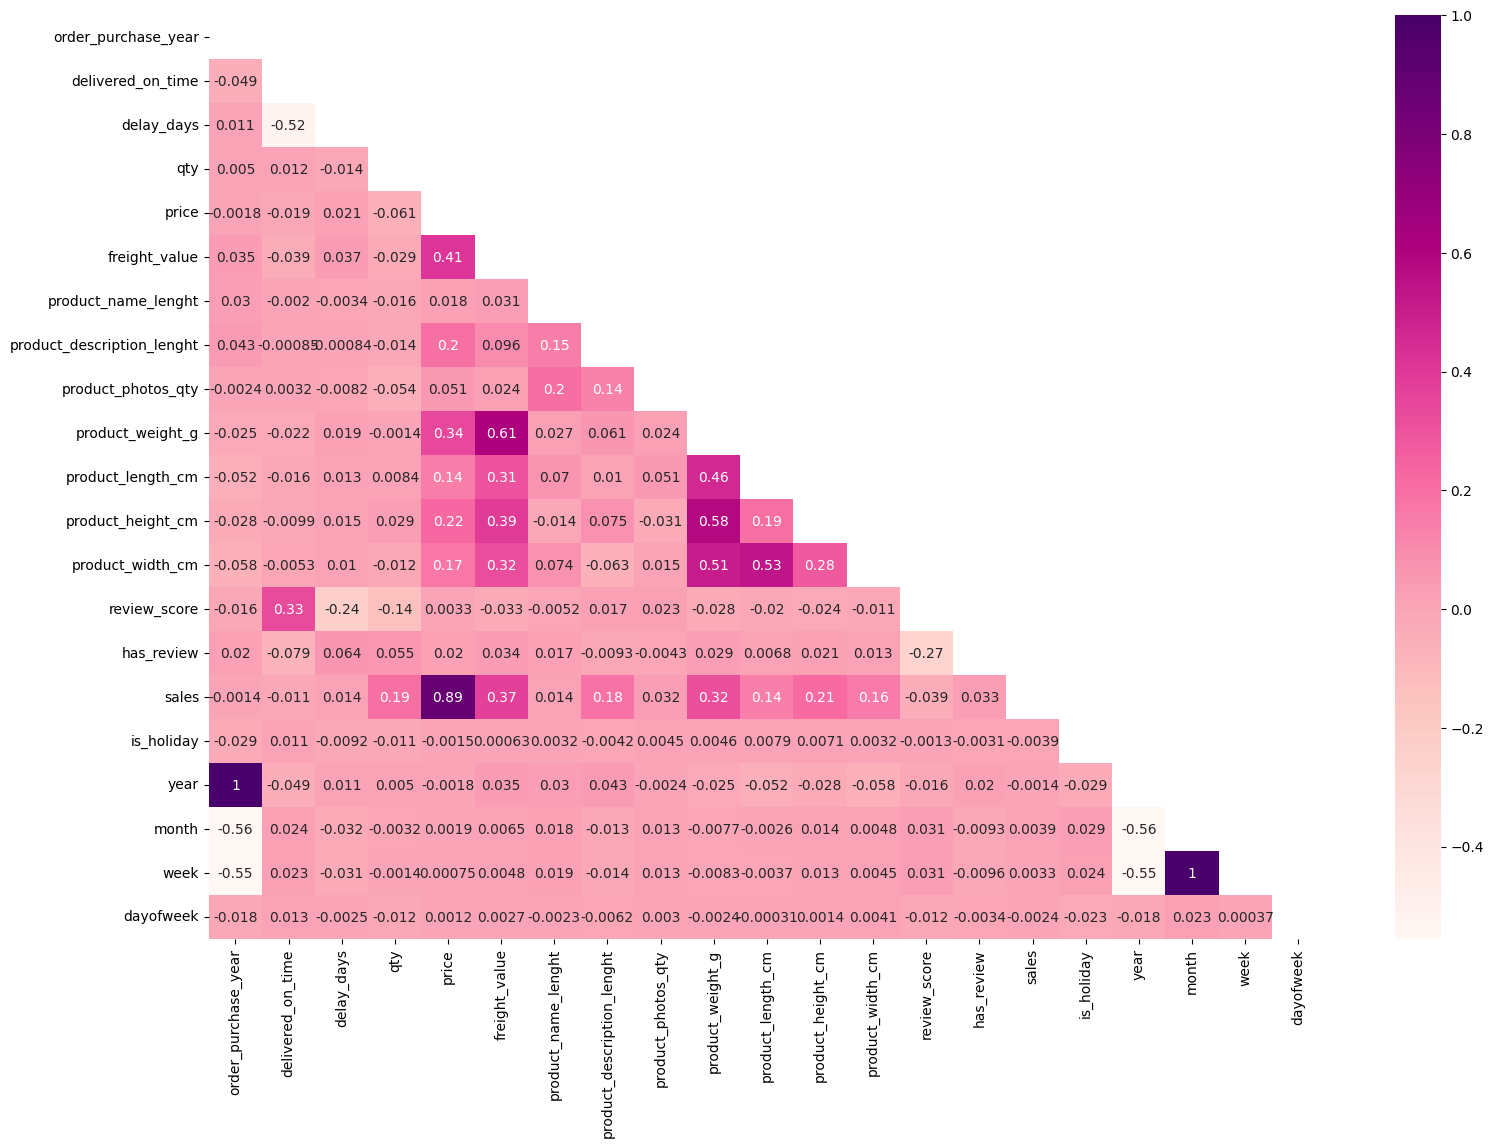

In [87]:
plt.figure(figsize=(18,12))
#correlation between all columns
corr_df= final_cleaned.select_dtypes(include=np.number).corr()
# creating mask
mask = np.triu(np.ones_like(corr_df.corr()))
# plotting a triangle correlation heatmap
sns.heatmap(corr_df, cmap="RdPu", annot=True, mask=mask)

MAE: 59,090.58
RMSE: 65,403.74
📌 Forecast accuracy: 94.05%


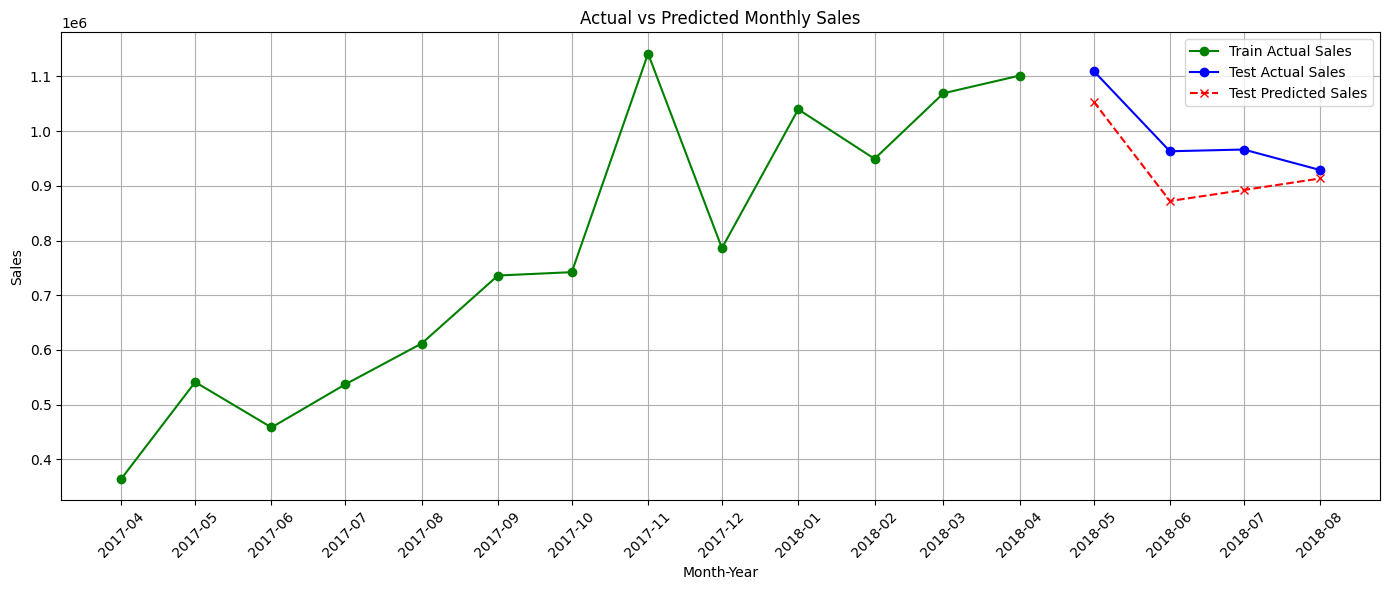

2018-05: 5.04% error
2018-06: 9.44% error
2018-07: 7.65% error
2018-08: 1.67% error


In [88]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
monthly = final_cleaned.groupby(['year', 'month']).agg({
    'sales': 'sum',                    # target
    'qty': 'sum',                       # total items sold
    'price': 'mean',                     # average price
    'freight_value': 'mean',             # average shipping cost
    'review_score': 'mean',              # average review
}).reset_index()

monthly = monthly.sort_values(['year', 'month'])
# Sales lag features
monthly['sales_lag_1'] = monthly['sales'].shift(1)
monthly['sales_lag_2'] = monthly['sales'].shift(2)
monthly['sales_lag_3'] = monthly['sales'].shift(3)

# Rolling averages
monthly['rolling_3'] = monthly['sales'].shift(1).rolling(3).mean()
monthly['rolling_6'] = monthly['sales'].shift(1).rolling(6).mean()

# Lag features for extra columns
monthly['qty_lag_1'] = monthly['qty'].shift(1)
monthly['price_lag_1'] = monthly['price'].shift(1)
monthly['freight_lag_1'] = monthly['freight_value'].shift(1)
monthly['review_lag_1'] = monthly['review_score'].shift(1)
holiday_months = [1,3,4,5,9,10,11,12]  # example for Brazil
monthly['is_holiday'] = monthly['month'].apply(lambda x: 1 if x in holiday_months else 0)
monthly = monthly.dropna().reset_index(drop=True)
features = [
    'year', 'month', 'is_holiday',
    'sales_lag_1', 'sales_lag_2', 'sales_lag_3',
    'rolling_3',
    'rolling_6',
    'qty', 'price', 'freight_value', 'review_score',
    'qty_lag_1', 'price_lag_1', 'freight_lag_1', 'review_lag_1'
]

X = monthly[features]
y = monthly['sales']
train_size = int(len(monthly) * 0.8)
X_train = X.iloc[:train_size]
y_train = y.iloc[:train_size]
X_test = X.iloc[train_size:]
y_test = y.iloc[train_size:]


model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mape = np.mean(np.abs((y_test - predictions) / (y_test + 1e-10))) * 100
accuracy = 100 - mape

print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"📌 Forecast accuracy: {accuracy:.2f}%")


# Create datetime columns for train and test sets
X_train_dates = pd.to_datetime(dict(year=X_train['year'], month=X_train['month'], day=1))
X_test_dates = pd.to_datetime(dict(year=X_test['year'], month=X_test['month'], day=1))

plt.figure(figsize=(14,6))

# Plot actual sales for train and test
plt.plot(X_train_dates, y_train, marker='o', linestyle='-', color='green', label='Train Actual Sales')
plt.plot(X_test_dates, y_test, marker='o', linestyle='-', color='blue', label='Test Actual Sales')

# Plot predicted sales for test
plt.plot(X_test_dates, predictions, marker='x', linestyle='--', color='red', label='Test Predicted Sales')

# Format x-axis as Month-Year
all_dates = pd.concat([X_train_dates, X_test_dates])
plt.xticks(all_dates, all_dates.dt.strftime('%Y-%m'), rotation=45)

plt.title('Actual vs Predicted Monthly Sales')
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Percent error for test set
percent_error = (abs(y_test - predictions) / y_test) * 100
for date, err in zip(X_test_dates, percent_error):
    print(f"{date.strftime('%Y-%m')}: {err:.2f}% error")


In [89]:
monthly

,year,month,sales,qty,price,freight_value,review_score,sales_lag_1,sales_lag_2,sales_lag_3,rolling_3,rolling_6,qty_lag_1,price_lag_1,freight_lag_1,review_lag_1,is_holiday
0,2017,4,364739.18,2898,132.662359,19.420776,4.096003,389792.82,254425.06,129918.63,2.580455e+05,1.366133e+05,3381.0,123.016405,19.007603,4.134074,1
1,2017,5,541365.79,4624,121.803694,19.358763,4.202605,364739.18,389792.82,254425.06,3.363190e+05,1.973582e+05,2898.0,132.662359,19.420776,4.096003,1
2,2017,6,458442.94,3963,120.934221,19.537818,4.186889,541365.79,364739.18,389792.82,4.319659e+05,2.800421e+05,4624.0,121.803694,19.358763,4.202605,0
3,2017,7,537256.63,5343,108.698339,19.155202,4.184234,458442.94,541365.79,364739.18,4.548493e+05,3.564474e+05,3963.0,120.934221,19.537818,4.186889,0
4,2017,8,611809.61,5589,115.525339,19.033064,4.275529,537256.63,458442.94,541365.79,5.123551e+05,4.243371e+05,5343.0,108.698339,19.155202,4.184234,0
5,2017,9,736116.93,5642,128.224094,19.776213,4.183513,611809.61,537256.63,458442.94,5.358364e+05,4.839012e+05,5589.0,115.525339,19.033064,4.275529,1
6,2017,10,742236.10,6416,124.133160,19.774047,4.108666,736116.93,611809.61,537256.63,6.283944e+05,5.416218e+05,5642.0,128.224094,19.776213,4.183513,1
7,2017,11,1141668.83,10324,116.331801,19.532835,3.894294,742236.10,736116.93,611809.61,6.967209e+05,6.045380e+05,6416.0,124.133160,19.774047,4.108666,1
8,2017,12,786157.35,7137,116.941799,18.895365,4.010926,1141668.83,742236.10,736116.93,8.733406e+05,7.045885e+05,10324.0,116.331801,19.532835,3.894294,1
9,2018,1,1039787.67,9502,114.915201,19.017816,3.999750,786157.35,1141668.83,742236.10,8.900208e+05,7.592076e+05,7137.0,116.941799,18.895365,4.010926,1


In [112]:
future_dates = pd.date_range(start='2018-09-01', end='2019-09-01', freq='MS')
future_df = pd.DataFrame({
    'year': future_dates.year,
    'month': future_dates.month
})

holiday_months = [1,3,4,5,9,10,11,12]
future_df['is_holiday'] = future_df['month'].apply(lambda x: 1 if x in holiday_months else 0)
last_history = monthly.copy()

future_predictions = []

for i in range(len(future_df)):
    row = future_df.iloc[i]

    # Build a single-row DF with same columns as features
    temp = {}

    temp['year'] = row['year']
    temp['month'] = row['month']
    temp['is_holiday'] = row['is_holiday']

    # LAG FEATURES (from last_history)
    temp['sales_lag_1'] = last_history['sales'].iloc[-1]
    temp['sales_lag_2'] = last_history['sales'].iloc[-2]
    temp['sales_lag_3'] = last_history['sales'].iloc[-3]

    # ROLLING FEATURES
    temp['rolling_3'] = last_history['sales'].iloc[-3:].mean()
    temp['rolling_6'] = last_history['sales'].iloc[-6:].mean()

    # Other lag features
    temp['qty'] = last_history['qty'].iloc[-1]     # optional: use last known or predicted future qty
    temp['price'] = last_history['price'].iloc[-1]
    temp['freight_value'] = last_history['freight_value'].iloc[-1]
    temp['review_score'] = last_history['review_score'].iloc[-1]

    temp['qty_lag_1'] = last_history['qty'].iloc[-1]
    temp['price_lag_1'] = last_history['price'].iloc[-1]
    temp['freight_lag_1'] = last_history['freight_value'].iloc[-1]
    temp['review_lag_1'] = last_history['review_score'].iloc[-1]

    # Convert to DataFrame
    temp_df = pd.DataFrame([temp])

    # Predict sales
    pred = model.predict(temp_df[features])[0]

    # Append to results
    future_predictions.append(pred)

    # Add new predicted row to history (for next lag)
    new_row = {
        'year': temp['year'],
        'month': temp['month'],
        'sales': pred,
        'qty': temp['qty'],
        'price': temp['price'],
        'freight_value': temp['freight_value'],
        'review_score': temp['review_score']
    }

    last_history = pd.concat([last_history, pd.DataFrame([new_row])], ignore_index=True)


In [113]:
future_df['predicted_sales'] = future_predictions
print(future_df)


    year  month  is_holiday  predicted_sales
0   2018      9           1      940100.9375
1   2018     10           1      926625.6875
2   2018     11           1      937185.3125
3   2018     12           1      923155.6875
4   2019      1           1      873438.6875
5   2019      2           0      852133.4375
6   2019      3           1      880764.3125
7   2019      4           1      881573.1875
8   2019      5           1      888721.5625
9   2019      6           0      874418.4375
10  2019      7           0      876659.9375
11  2019      8           0      894834.3125
12  2019      9           1      925460.9375


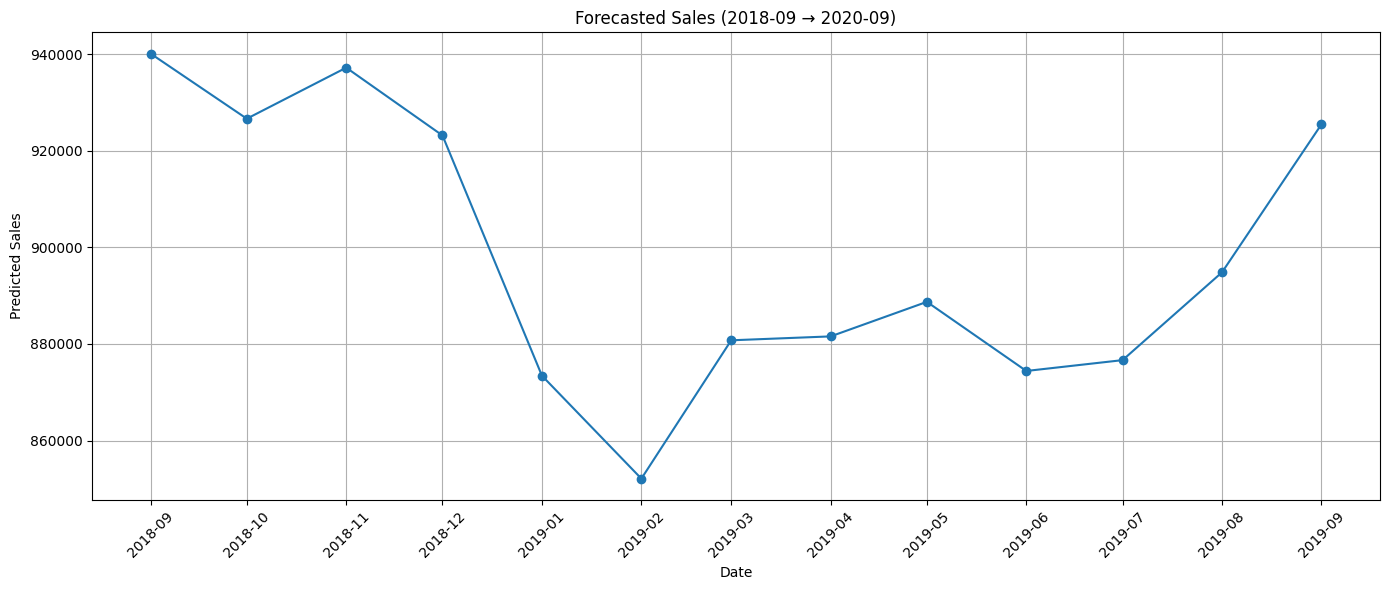

In [114]:
future_df['date'] = future_dates

plt.figure(figsize=(14,6))

plt.plot(future_df['date'], future_df['predicted_sales'],
         marker='o', linestyle='-', label="Forecasted Sales")

plt.title("Forecasted Sales (2018-09 → 2020-09)")
plt.xlabel("Date")
plt.ylabel("Predicted Sales")
plt.grid(True)

# Format ticks: show every month
plt.xticks(future_df['date'], future_df['date'].dt.strftime('%Y-%m'), rotation=45)

plt.tight_layout()
plt.show()
